<a href="https://colab.research.google.com/github/emish8/ANN-and-CNN-on-mnist-data/blob/main/Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

This is a kaggle competetion Dataset. The aim of the competetion is to convert photos to monet style paintings.

There are two types pf photos:

1. Monet Paintings (jpg) - 300 samples
2. Photo (jpg) - 1000 samples

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Downloading Dataset

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!echo "KAGGLE_USERNAME=XXXXXX" >> .env
!echo "KAGGLE_KEY=XXXXXXXXXXXXXXXXXXX" >> .env

In [6]:
# Fill in your user name and key from creating the kaggle account and API token file

import json
from dotenv import dotenv_values

CONFIG = dotenv_values('.env')

kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [43]:
! kaggle competitions download -c gan-getting-started

!unzip -o  gan-getting-started.zip &> /dev/null 

gan-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# function to read all filenames
import glob
def read_filenames(path):
  path = path + '*.jpg'
  names = glob.glob(path)
  return names

In [9]:
monet_path = '/content/monet_jpg/'
monet_filenames = read_filenames(monet_path)
print('No. of monet images in jpg format:', len(monet_filenames))

No. of monet images in jpg format: 300


# Checking Image Shape

In [10]:
def image_shape(filenames):
  l = len(filenames)
  shapes = set()
  for i in range(l):
    img = cv2.imread(filenames[i])
    shapes.add(img.shape)

    if  len(shapes)==1:
      s = list(shapes)[0]
      print(f'All images of same shape:{s}.')
    else:
      print('All images are not of same shape.', shapes)

    return 

In [11]:
#monets
image_shape(monet_filenames)
#photos
image_shape(monet_filenames)

All images of same shape:(256, 256, 3).
All images of same shape:(256, 256, 3).


# Dataset Sample

In [12]:
def display_image(num, row, filenames):

  plt.figure(figsize=(num,num))
  
  for i in range(num):
    img = cv2.imread(filenames[i])
    image =  cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    ax = plt.subplot(row, row, i + 1) 
    plt.imshow(image)
    plt.axis("off")
  
  return 

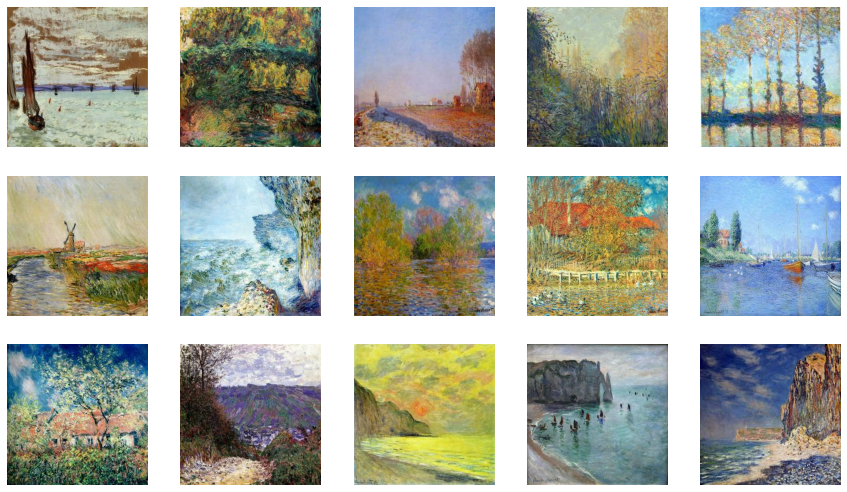

In [13]:
# sample from monet image dataset
display_image(15,5, monet_filenames)

No. of images in photo set: 7038


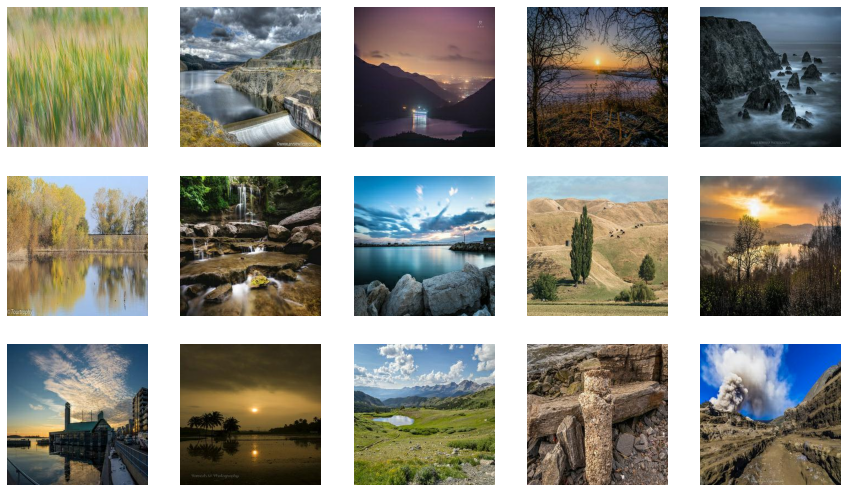

In [14]:
# sample from photo dataset
photo_path = '/content/photo_jpg/'
photo_filenames = read_filenames(photo_path)
print('No. of images in photo set:', len(photo_filenames))
display_image(15,5, photo_filenames)

# Visualizing Gray image and RGB Channels

In [15]:
def channels(img_path):

   img = cv2.imread(img_path)
   img =  cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
   gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)

  
   plt.figure(figsize=(15,15))
   plt.subplot(1,5,1), plt.imshow(img),  plt.axis("off")
   plt.subplot(1,5,2), plt.imshow(gray, cmap = 'gray'), plt.axis("off")

   copy_img = np.full_like(img, 0)  # return array with same shape but with zeros values

   r, g, b =  img[:,:,0],  img[:,:,1],  img[:,:,2]
   
      
   r_img = np.full_like(img, 0)
   g_img = np.full_like(img, 0)
   b_img = np.full_like(img, 0) 

   r_img[:,:,0] = r
   g_img[:,:,1] = g
   b_img[:,:,2] = b

   plt.subplot(1,5,3), plt.imshow(r_img), plt.axis("off")
   plt.subplot(1,5,4), plt.imshow(b_img), plt.axis("off")
   plt.subplot(1,5,5), plt.imshow(g_img), plt.axis("off")
   plt.axis("off")

   return 



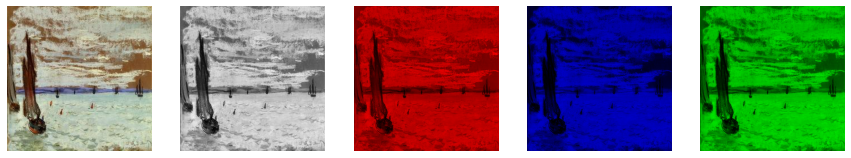

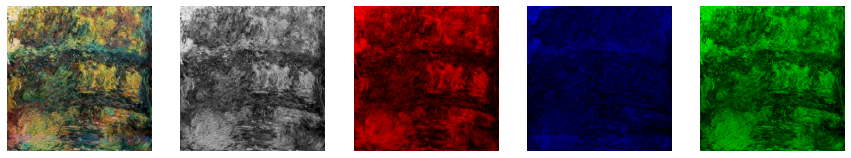

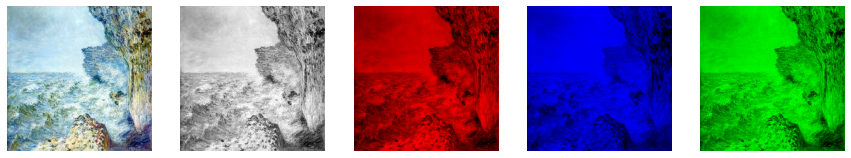

In [16]:
# diffrent channels for monets
img_path1 = monet_filenames[0]
channels(img_path1)

img_path2 = monet_filenames[1]
channels(img_path2)


img_path3 = monet_filenames[6]
channels(img_path3)

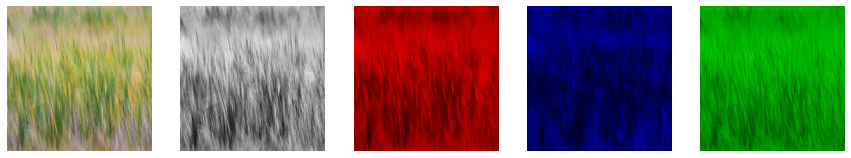

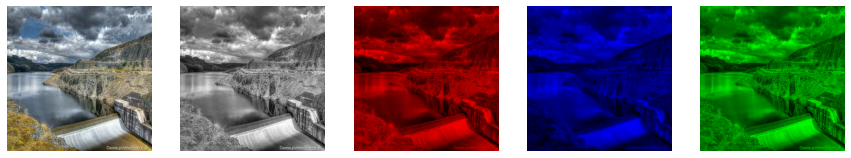

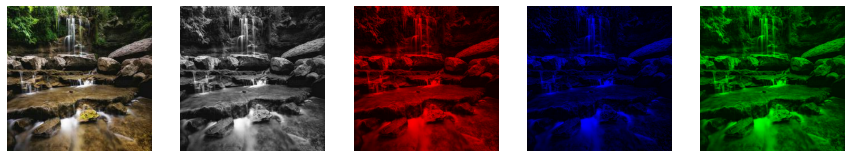

In [17]:
# diffrent channels for photos
img_path4 = photo_filenames[0]
channels(img_path4)

img_path5 = photo_filenames[1]
channels(img_path5)


img_path6 = photo_filenames[6]
channels(img_path6)

In [33]:
#3 random jitters
def random_jitter(img_path):
  
  #reading img
  image = cv2.imread(img_path)
  image =  cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

  # resizing to 360 x 360 x 3
  with_noise_image = tf.image.resize(image, [480, 480], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1).set_title('Original'), plt.imshow(image), plt.axis('off')
  plt.subplot(1,2,2).set_title('With Random Jitter (Noise)'), plt.imshow(with_noise_image), plt.axis('off')


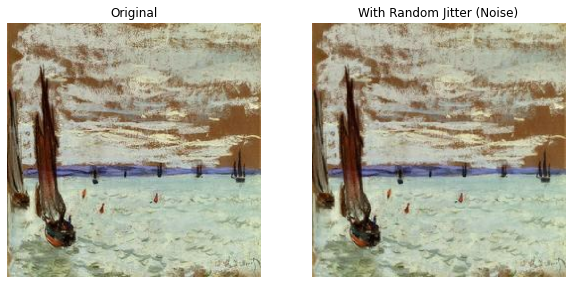

In [34]:
#  monets after adding noise
img_path1 = monet_filenames[0]
random_jitter(img_path1)

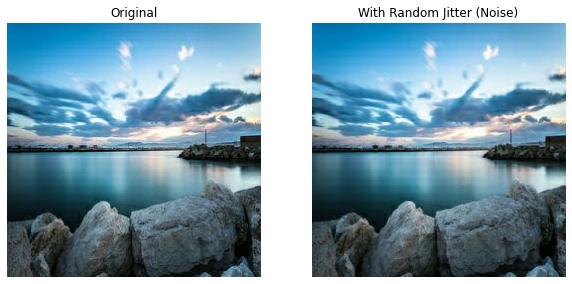

In [35]:
# photo after adding noise
img_path7 = photo_filenames[7]
random_jitter(img_path7)

In [38]:
def random_mirroring(img_path):

  #reading img
  image = cv2.imread(img_path)
  image =  cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

  # random mirroring
  flipped_image = tf.image.random_flip_left_right(image)

  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1).set_title('Original'), plt.imshow(image), plt.axis('off')
  plt.subplot(1,2,2).set_title('Flipped'), plt.imshow(flipped_image), plt.axis('off')


  return 

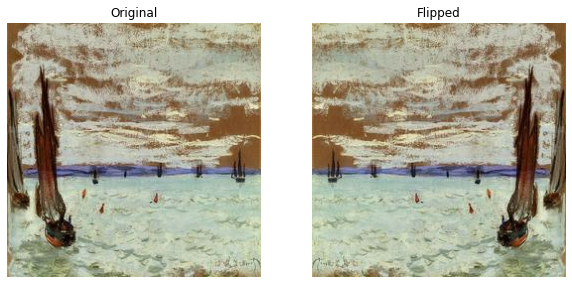

In [39]:
#  monets after adding noise
img_path1 = monet_filenames[0]
random_mirroring(img_path1)

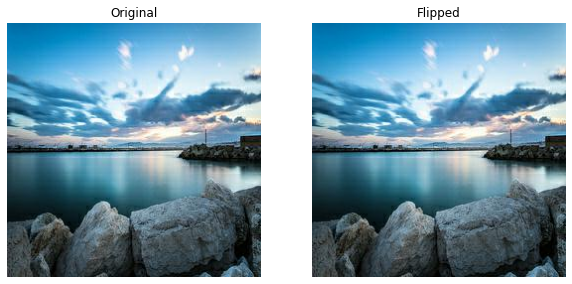

In [42]:
# photo after adding noise
img_path7 = photo_filenames[7]
random_mirroring(img_path7) # the function flips image at random only, here we get the same image